In [ ]:
!pip install scikeras

In [ ]:
!pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.layers import Dense,Dropout
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam,RMSprop
from sklearn.model_selection import GridSearchCV,KFold

In [ ]:
from google.colab import files
uploaded=files.upload()

In [ ]:
data=pd.read_csv('forestfires (1).csv')
data

In [ ]:
data.columns

In [ ]:
data.info()

In [ ]:
data.drop('month',axis=1,inplace=True)
data.drop('day',axis=1,inplace=True)
data

In [ ]:
data.corr()

In [ ]:
data.describe()

In [ ]:
columns=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind','rain', 'area']
for i in columns:
  plt.figure()
  sns.distplot(data[i])

In [ ]:
columns=['dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed','monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul','monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep']
for i in columns:
  plt.figure()
  sns.countplot(x=data[i])


In [ ]:
le=LabelEncoder()
data['size_category']=le.fit_transform(data['size_category'])
data

In [ ]:
corr=data.corr()
corr

In [ ]:
plt.figure(figsize=(25,12))
sns.heatmap(corr,annot=True)
plt.show()

In [ ]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
y

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
x_train.shape,x_test.shape

In [ ]:
y_train.shape,y_test.shape

In [ ]:
from imblearn.over_sampling import SMOTE
model=SMOTE(random_state=20)
x_train_st,y_train_st=model.fit_resample(x_train,np.array(y_train).ravel())
x_train_st,y_train_st

In [ ]:
x_train_st.shape,y_train_st.shape

In [ ]:
x_train=x_train_st.copy()
y_train=y_train_st.copy()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
X_train=scale.fit_transform(x_train)
X_train

In [ ]:
X_test=scale.fit_transform(x_test)
X_test

# Tuning Of HyperParameter :Batch size and Epochs

In [ ]:
def create_model():
  model=Sequential()
  model.add(Dense(12,input_dim=28,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(8,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
  adam=Adam(lr=0.01)
  model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
  return model

In [ ]:
from sklearn.model_selection import GridSearchCV,KFold
model=KerasClassifier(build_fn=create_model,verbose=0)
batch_size=[10,20,30]
epochs=[50,100,150]
param_grid=dict(batch_size=batch_size,epochs=epochs)
gsv=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=5)
result=gsv.fit(X_train,y_train)

In [ ]:
print(result.best_score_,result.best_params_)

In [ ]:
def create_model(learning_rate,dropout_rate):
  model=Sequential()
  model.add(Dense(12,input_dim=28,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(8,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
  adam=Adam(lr=learning_rate)
  model.compile(loss='binary_crossentropy',optimizer=adam,metrics='accuracy')
  return model

In [ ]:
model1=KerasClassifier(build_fn=create_model,batch_size=10,epochs=50,verbose=0,learning_rate=[0.01,0.001,0.1],
dropout_rate=[0.2,0.1,0.02])
param_grid=dict(learning_rate=[0.01,0.001,0.1],dropout_rate=[0.2,0.1,0.02])
result=GridSearchCV(estimator=model1,param_grid=param_grid,cv=KFold(),verbose=5)
result1=result.fit(X_train,y_train)

In [ ]:
print(result1.best_params_,result.best_score_)

In [ ]:
def create_model(activation_Function,init):
  model=Sequential()
  model.add(Dense(12,input_dim=28,kernel_initializer=init,activation=activation_Function))
  model.add(Dropout(0.2))
  model.add(Dense(8,kernel_initializer=init,activation=activation_Function))
  model.add(Dropout(0.2))
  model.add(Dense(1,kernel_initializer=init,activation='sigmoid'))
  adam=Adam(lr=0.01)
  model.compile(loss='binary_crossentropy',optimizer=adam,metrics='accuracy')
  return model

In [ ]:
model2=KerasClassifier(build_fn=create_model,batch_size=10,epochs=50,verbose=0,activation_Function=['relu','tanh','softmax','linear'],
init=['zero','uniform','normal'])
param_grid=dict(activation_Function=['relu','tanh','softmax','linear'],init=['zero','uniform','normal'])
gsv1=GridSearchCV(estimator=model2,param_grid=param_grid,cv=KFold(),verbose=5)
result1=gsv1.fit(X_train,y_train)

In [ ]:
print(result1.best_params_,result1.best_score_)

In [ ]:
def create_model(neuron1,neuron2):
  model=Sequential()
  model.add(Dense(neuron1,input_dim=28,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(neuron2,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
  adam=Adam(lr=0.001)
  model.compile(loss='binary_crossentropy',optimizer=adam,metrics='accuracy')
  return model

In [ ]:
model=KerasClassifier(build_fn=create_model,batch_size=30,epochs=10,verbose=0,neuron1=[12,10,9],neuron2=[8,6,4])
param_grid=dict(neuron1=[12,10,9],neuron2=[8,6,4])
gsv=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=5)
result=gsv.fit(X_train,y_train)

In [ ]:
print(result.best_params_,result.best_score_)

In [ ]:
def create_model():
  model=Sequential()
  model.add(Dense(10,input_dim=28,kernel_initializer='normal',activation='tanh'))
  model.add(Dropout(0.1))
  model.add(Dense(8,kernel_initializer='normal',activation='tanh'))
  model.add(Dropout(0.1))
  model.add(Dense(1,kernel_initializer='normal',activation='sigmoid'))
  adam=Adam(lr=0.01)
  model.compile(loss='binary_crossentropy',optimizer=adam,metrics='accuracy')
  return model

In [ ]:
model=KerasClassifier(build_fn=create_model,batch_size=10,epochs=150)
model.fit(X_train,y_train)

In [ ]:
y_pred_train=model.predict(X_train)

In [ ]:
print(classification_report(y_train,y_pred_train))

In [ ]:
accu_train=accuracy_score(y_train,y_pred_train)
accu_train

In [ ]:
y_pred_test=model.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred_test))

In [ ]:
accu_test=accuracy_score(y_test,y_pred_test)
accu_test

In [ ]:
import plotly.express as px
x=['accu_train','0accu_test']
y=[accu_train,accu_test]
fig=px.histogram(x=x,y=y,text_auto=True,labels='x')
fig.show()

# **Gas_Turbines**

In [ ]:
!pip install scikeras

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,KFold,GridSearchCV
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.layers import Dense,Dropout
from sklearn.metrics import  accuracy_score,confusion_matrix
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam,RMSprop

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving gas_turbines.csv to gas_turbines.csv


In [ ]:
gas=pd.read_csv('gas_turbines.csv')
gas

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [ ]:
data=gas.iloc[:,[0,1,2,7]]
data

,AT,AP,AH,TEY
0,6.8594,1007.9,96.799,114.70
1,6.7850,1008.4,97.118,114.72
2,6.8977,1008.8,95.939,114.71
3,7.0569,1009.2,95.249,114.72
4,7.3978,1009.7,95.150,114.72
...,...,...,...,...
15034,9.0301,1005.6,98.460,111.61
15035,7.8879,1005.9,99.093,111.78
15036,7.2647,1006.3,99.496,110.19
15037,7.0060,1006.8,99.008,110.74


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   TEY     15039 non-null  float64
dtypes: float64(4)
memory usage: 470.1 KB


In [ ]:
data.columns

Index(['AT', 'AP', 'AH', 'TEY'], dtype='object')

<ipython-input-8-ffd486915007>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


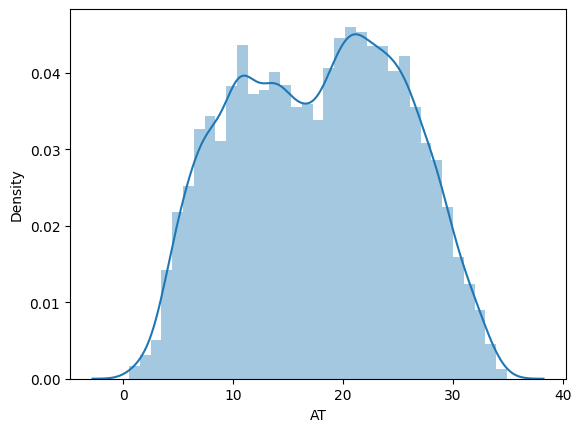

<ipython-input-8-ffd486915007>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


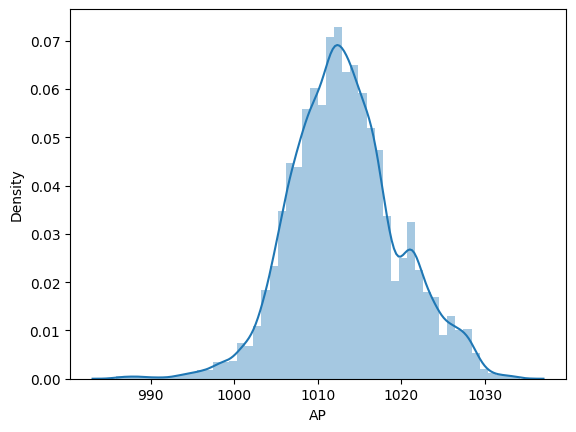

<ipython-input-8-ffd486915007>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


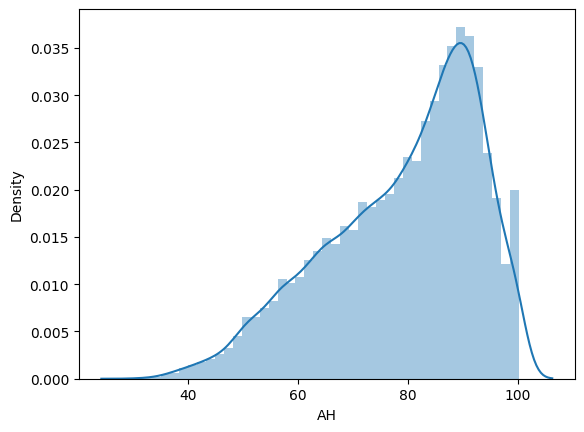

<ipython-input-8-ffd486915007>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


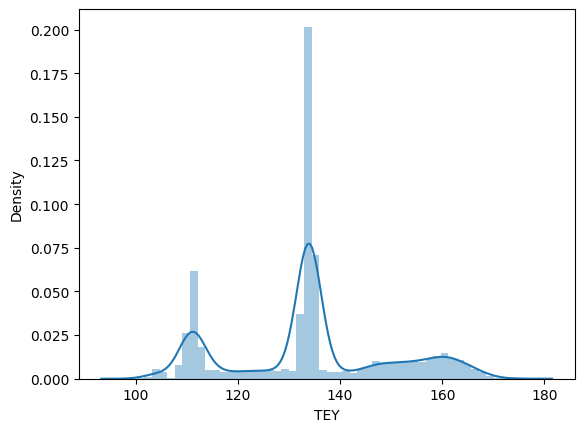

In [ ]:
import seaborn as sns
columns=['AT', 'AP', 'AH', 'TEY']
for i in columns:
  sns.distplot(data[i])
  plt.show()

In [ ]:
corr=data.corr()
corr

,AT,AP,AH,TEY
AT,1.000000,-0.412953,-0.549432,-0.207495
AP,-0.412953,1.000000,0.042573,0.146939
AH,-0.549432,0.042573,1.000000,-0.110272
TEY,-0.207495,0.146939,-0.110272,1.000000


<Axes: >

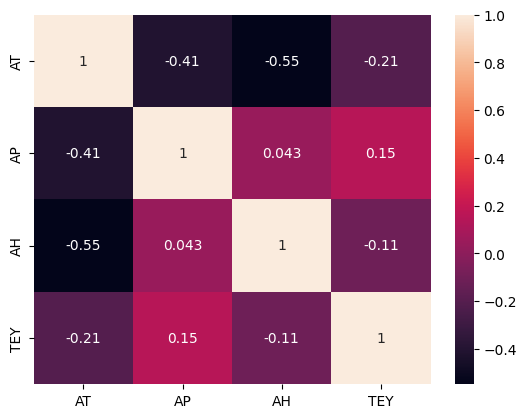

In [ ]:
sns.heatmap(corr,annot=True)

In [ ]:
data['TEY'].nunique()

4207

In [ ]:
data['TEY'].max()

174.61

In [ ]:
data['TEY']=gas['TEY'].apply(lambda x:1 if x>150 else 0)

<ipython-input-13-816bc3cf33a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TEY']=gas['TEY'].apply(lambda x:1 if x>150 else 0)


In [ ]:
data['TEY'].unique()

array([0, 1])

<Axes: xlabel='TEY', ylabel='count'>

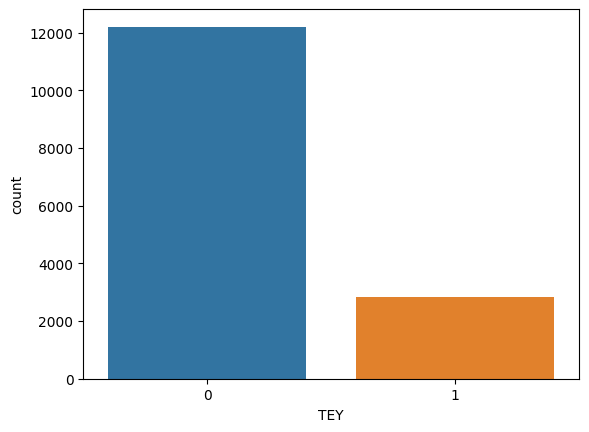

In [ ]:
sns.countplot(x=data['TEY'])

In [ ]:
data

,AT,AP,AH,TEY
0,6.8594,1007.9,96.799,0
1,6.7850,1008.4,97.118,0
2,6.8977,1008.8,95.939,0
3,7.0569,1009.2,95.249,0
4,7.3978,1009.7,95.150,0
...,...,...,...,...
15034,9.0301,1005.6,98.460,0
15035,7.8879,1005.9,99.093,0
15036,7.2647,1006.3,99.496,0
15037,7.0060,1006.8,99.008,0


In [ ]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
x

,AT,AP,AH
0,6.8594,1007.9,96.799
1,6.7850,1008.4,97.118
2,6.8977,1008.8,95.939
3,7.0569,1009.2,95.249
4,7.3978,1009.7,95.150
...,...,...,...
15034,9.0301,1005.6,98.460
15035,7.8879,1005.9,99.093
15036,7.2647,1006.3,99.496
15037,7.0060,1006.8,99.008


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
x_train.shape,x_test.shape

((12031, 3), (3008, 3))

In [ ]:
y_train.shape,y_test.shape

((12031,), (3008,))

In [ ]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_train=scale.fit_transform(x_train)
X_train

array([[ 0.93892095, -0.15579266, -0.21260407],
       [-0.65905182, -0.37499722,  1.34386233],
       [-0.03476705,  0.07906937, -0.16496456],
       ...,
       [ 0.28228157,  0.17301418, -0.23551467],
       [ 1.82177737, -1.0326109 , -1.62004245],
       [ 0.41939085, -1.00129597,  0.3149944 ]])

In [ ]:
x_test=scale.fit_transform(x_test)
x_test

array([[-0.89007064,  0.12049707,  1.49346875],
       [-1.67119044,  0.81228171,  0.43345636],
       [ 1.02141335, -0.29457372,  0.77958577],
       ...,
       [ 0.23145274,  0.4433299 ,  0.87345745],
       [-1.78164213,  1.31959045, -1.02474091],
       [-0.70585468,  1.15048754,  0.77113661]])

In [ ]:
def create_model():
  model=Sequential()
  model.add(Dense(12,input_dim=3,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(8,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
  optimizer=RMSprop(0.03)
  model.compile(loss='mean_squared_error',metrics='accuracy',optimizer=optimizer)
  return model

In [ ]:
model=KerasClassifier(build_fn=create_model,verbose=0)
batch_size=[10,20]
epochs=[50,100,150]
param_grid=dict(batch_size=batch_size,epochs=epochs)
gsv=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=5)
result=gsv.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END ..........batch_size=10, epochs=50;, score=0.800 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END ..........batch_size=10, epochs=50;, score=0.813 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END ..........batch_size=10, epochs=50;, score=0.822 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END ..........batch_size=10, epochs=50;, score=0.822 total time= 1.3min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END ..........batch_size=10, epochs=50;, score=0.798 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END .........batch_size=10, epochs=100;, score=0.800 total time= 3.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END .........batch_size=10, epochs=100;, score=0.813 total time= 3.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END .........batch_size=10, epochs=100;, score=0.822 total time= 3.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END .........batch_size=10, epochs=100;, score=0.822 total time= 3.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END .........batch_size=10, epochs=100;, score=0.798 total time= 3.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END .........batch_size=10, epochs=150;, score=0.800 total time= 4.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END .........batch_size=10, epochs=150;, score=0.813 total time= 4.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END .........batch_size=10, epochs=150;, score=0.822 total time= 3.6min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END .........batch_size=10, epochs=150;, score=0.822 total time= 4.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END .........batch_size=10, epochs=150;, score=0.798 total time= 4.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END ..........batch_size=20, epochs=50;, score=0.800 total time=  42.1s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END ..........batch_size=20, epochs=50;, score=0.813 total time=  42.1s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END ..........batch_size=20, epochs=50;, score=0.822 total time=  42.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END ..........batch_size=20, epochs=50;, score=0.822 total time=  38.0s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END ..........batch_size=20, epochs=50;, score=0.798 total time=  38.0s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END .........batch_size=20, epochs=100;, score=0.800 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END .........batch_size=20, epochs=100;, score=0.813 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END .........batch_size=20, epochs=100;, score=0.822 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END .........batch_size=20, epochs=100;, score=0.822 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END .........batch_size=20, epochs=100;, score=0.798 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END .........batch_size=20, epochs=150;, score=0.813 total time= 2.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END .........batch_size=20, epochs=150;, score=0.813 total time= 2.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END .........batch_size=20, epochs=150;, score=0.822 total time= 1.8min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END .........batch_size=20, epochs=150;, score=0.822 total time= 2.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END .........batch_size=20, epochs=150;, score=0.798 total time= 1.8min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


In [ ]:
print(result.best_params_,result.best_score_)

{'batch_size': 10, 'epochs': 50} 0.812568944623623


In [ ]:
def create_model(dropout_rate,learning_rate):
  model=Sequential()
  model.add(Dense(12,input_dim=3,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(8,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
  adam=Adam(learning_rate=learning_rate)
  model.compile(loss='binary_crossentropy',metrics='accuracy',optimizer=adam)
  return model

In [ ]:
model=KerasClassifier(build_fn=create_model,verbose=0,batch_size=10,epochs=20,dropout_rate = dropout_rate,learning_rate=learning_rate)
dropout_rate=[0.1,0.3]
learning_rate=[0.001,0.01]
param_grid=dict(dropout_rate=dropout_rate,learning_rate=learning_rate)
grid_search=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=5)
result=grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END dropout_rate=0.1, learning_rate=0.001;, score=0.796 total time=  44.8s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END dropout_rate=0.1, learning_rate=0.001;, score=0.814 total time=  34.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END dropout_rate=0.1, learning_rate=0.001;, score=0.827 total time=  30.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END dropout_rate=0.1, learning_rate=0.001;, score=0.821 total time=  31.2s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END dropout_rate=0.1, learning_rate=0.001;, score=0.837 total time=  42.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END dropout_rate=0.1, learning_rate=0.01;, score=0.796 total time=  29.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END dropout_rate=0.1, learning_rate=0.01;, score=0.802 total time=  42.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END dropout_rate=0.1, learning_rate=0.01;, score=0.820 total time=  29.9s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END dropout_rate=0.1, learning_rate=0.01;, score=0.821 total time=  42.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END dropout_rate=0.1, learning_rate=0.01;, score=0.823 total time=  42.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END dropout_rate=0.3, learning_rate=0.001;, score=0.796 total time=  42.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END dropout_rate=0.3, learning_rate=0.001;, score=0.802 total time=  29.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END dropout_rate=0.3, learning_rate=0.001;, score=0.820 total time=  42.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END dropout_rate=0.3, learning_rate=0.001;, score=0.821 total time=  31.1s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END dropout_rate=0.3, learning_rate=0.001;, score=0.823 total time=  30.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END dropout_rate=0.3, learning_rate=0.01;, score=0.796 total time=  31.1s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END dropout_rate=0.3, learning_rate=0.01;, score=0.802 total time=  42.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END dropout_rate=0.3, learning_rate=0.01;, score=0.820 total time=  42.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END dropout_rate=0.3, learning_rate=0.01;, score=0.821 total time=  29.7s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END dropout_rate=0.3, learning_rate=0.01;, score=0.823 total time=  42.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


In [ ]:
print(result.best_params_,result.best_score_)

{'dropout_rate': 0.1, 'learning_rate': 0.001} 0.8190527351473138


In [ ]:
def create_model(activation_Function,init):
  model=Sequential()
  model.add(Dense(12,input_dim=3,kernel_initializer=init,activation=activation_Function))
  model.add(Dropout(0.2))
  model.add(Dense(8,kernel_initializer=init,activation=activation_Function))
  model.add(Dropout(0.2))
  model.add(Dense(1,kernel_initializer=init,activation='sigmoid'))
  adam=Adam(learning_rate=0.001)
  model.compile(loss='binary_crossentropy',metrics='accuracy',optimizer=adam)
  return model

In [ ]:
model=KerasClassifier(build_fn=create_model,batch_size=10,epochs=50,verbose=0,activation_Function=['relu','tanh','softmax','linear'],
init=['zero','uniform','normal'])
param_grid=dict(activation_Function=['relu','tanh','softmax','linear'],init=['zero','uniform','normal'])
gsv=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=5)
result1= gsv.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END activation_Function=relu, init=zero;, score=0.796 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END activation_Function=relu, init=zero;, score=0.802 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END activation_Function=relu, init=zero;, score=0.820 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END activation_Function=relu, init=zero;, score=0.821 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END activation_Function=relu, init=zero;, score=0.823 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END activation_Function=relu, init=uniform;, score=0.796 total time= 1.3min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END activation_Function=relu, init=uniform;, score=0.802 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END activation_Function=relu, init=uniform;, score=0.829 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END activation_Function=relu, init=uniform;, score=0.821 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END activation_Function=relu, init=uniform;, score=0.823 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END activation_Function=relu, init=normal;, score=0.810 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END activation_Function=relu, init=normal;, score=0.814 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END activation_Function=relu, init=normal;, score=0.828 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END activation_Function=relu, init=normal;, score=0.830 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END activation_Function=relu, init=normal;, score=0.823 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END activation_Function=tanh, init=zero;, score=0.796 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END activation_Function=tanh, init=zero;, score=0.802 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END activation_Function=tanh, init=zero;, score=0.820 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END activation_Function=tanh, init=zero;, score=0.821 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END activation_Function=tanh, init=zero;, score=0.823 total time= 1.3min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END activation_Function=tanh, init=uniform;, score=0.803 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END activation_Function=tanh, init=uniform;, score=0.808 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END activation_Function=tanh, init=uniform;, score=0.823 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END activation_Function=tanh, init=uniform;, score=0.826 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END activation_Function=tanh, init=uniform;, score=0.828 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END activation_Function=tanh, init=normal;, score=0.802 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END activation_Function=tanh, init=normal;, score=0.808 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END activation_Function=tanh, init=normal;, score=0.821 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END activation_Function=tanh, init=normal;, score=0.829 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END activation_Function=tanh, init=normal;, score=0.829 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END activation_Function=softmax, init=zero;, score=0.796 total time= 1.3min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END activation_Function=softmax, init=zero;, score=0.802 total time= 1.3min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END activation_Function=softmax, init=zero;, score=0.820 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END activation_Function=softmax, init=zero;, score=0.821 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END activation_Function=softmax, init=zero;, score=0.823 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END activation_Function=softmax, init=uniform;, score=0.796 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END activation_Function=softmax, init=uniform;, score=0.802 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END activation_Function=softmax, init=uniform;, score=0.820 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END activation_Function=softmax, init=uniform;, score=0.821 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END activation_Function=softmax, init=uniform;, score=0.823 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END activation_Function=softmax, init=normal;, score=0.797 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END activation_Function=softmax, init=normal;, score=0.802 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END activation_Function=softmax, init=normal;, score=0.821 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END activation_Function=softmax, init=normal;, score=0.821 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END activation_Function=softmax, init=normal;, score=0.823 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END activation_Function=linear, init=zero;, score=0.796 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END activation_Function=linear, init=zero;, score=0.802 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END activation_Function=linear, init=zero;, score=0.820 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END activation_Function=linear, init=zero;, score=0.821 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END activation_Function=linear, init=zero;, score=0.823 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END activation_Function=linear, init=uniform;, score=0.795 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END activation_Function=linear, init=uniform;, score=0.808 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END activation_Function=linear, init=uniform;, score=0.808 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END activation_Function=linear, init=uniform;, score=0.817 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END activation_Function=linear, init=uniform;, score=0.819 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END activation_Function=linear, init=normal;, score=0.796 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END activation_Function=linear, init=normal;, score=0.804 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END activation_Function=linear, init=normal;, score=0.813 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END activation_Function=linear, init=normal;, score=0.816 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END activation_Function=linear, init=normal;, score=0.817 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


In [ ]:
print(result1.best_params_,result1.best_score_)

In [ ]:
def create_model():
  model=Sequential()
  model.add(Dense(12,input_dim=3,kernel_initializer='uniform',activation='tanh'))
  model.add(Dropout(0.1))
  model.add(Dense(8,kernel_initializer='uniform',activation='tanh'))
  model.add(Dropout(0.1))
  model.add(Dense(1,kernel_initializer='uniform',activation='tanh'))
  adam=Adam(learning_rate=0.001)
  model.compile(loss='binary_crossentropy',metrics='accuracy',optimizer=adam)
  return model

In [ ]:
model=KerasClassifier(build_fn=create_model,batch_size=10,epochs=50)
model.fit(X_train,y_train)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


1204/1204 [==============================] - 8s 6ms/step - loss: 0.4867 - accuracy: 0.8108
Epoch 2/50
1204/1204 [==============================] - 7s 5ms/step - loss: 0.4263 - accuracy: 0.8109
Epoch 3/50
1204/1204 [==============================] - 7s 6ms/step - loss: 0.4202 - accuracy: 0.8101
Epoch 4/50
1204/1204 [==============================] - 7s 6ms/step - loss: 0.4258 - accuracy: 0.8109
Epoch 5/50
1204/1204 [==============================] - 8s 7ms/step - loss: 0.4224 - accuracy: 0.8108
Epoch 6/50
1204/1204 [==============================] - 5s 4ms/step - loss: 0.4235 - accuracy: 0.8089
Epoch 7/50
1204/1204 [==============================] - 7s 6ms/step - loss: 0.4209 - accuracy: 0.8123
Epoch 8/50
1204/1204 [==============================] - 5s 5ms/step - loss: 0.4226 - accuracy: 0.8114
Epoch 9/50
1204/1204 [==============================] - 3s 2ms/step - loss: 0.4230 - accuracy: 0.8100
Epoch 10/50
1204/1204 [==============================] - 3s 3ms/step - loss: 0.4167 - accurac

KerasClassifier(
	model=None
	build_fn=<function create_model at 0x78b23afa05e0>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=10
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=50
	class_weight=None
)

In [ ]:
y_pred_train=model.predict(X_train)

1204/1204 [==============================] - 2s 1ms/step


In [ ]:
y_pred_test=model.predict(x_test)

301/301 [==============================] - 0s 1ms/step


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90      9757
           1       0.00      0.00      0.00      2274

    accuracy                           0.81     12031
   macro avg       0.41      0.50      0.45     12031
weighted avg       0.66      0.81      0.73     12031



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
accu_score_train=accuracy_score(y_train,y_pred_train)

In [ ]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90      2446
           1       0.00      0.00      0.00       562

    accuracy                           0.81      3008
   macro avg       0.41      0.50      0.45      3008
weighted avg       0.66      0.81      0.73      3008



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
accu_score_test=accuracy_score(y_test,y_pred_test)
accu_score_test

0.8131648936170213